Step - 1 | Importing Libraries

In [45]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

Step -2 | Loding & exploring the data

In [35]:
data = pd.read_csv("D:\Food-truck_Data.txt")
data.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [36]:

data = np.loadtxt(os.path.join('Data', 'D:\Food-truck_Data.txt'), delimiter=',')
X = data[:, 0]
y = data[:, 1]


Step - 3 | Visualising the data

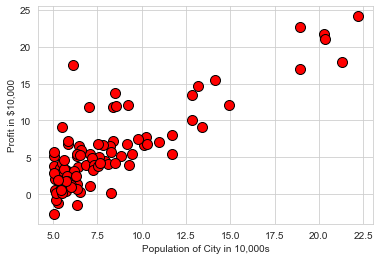

In [37]:
def plotData(X, y):
    fig = pyplot.figure() #it opens a new figure
    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
    
plotData(X, y)

Step - 4 | Computing the Cost

In [38]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    
    J = 1 / (2 * m) * (np.sum((y_pred - y) ** 2))
    return J

In [39]:
m = data.size
theta = np.zeros((2,1))
X = np.append(np.ones((m, 1)), data.reshape(m, 1), axis=1)
y = data.reshape(m, 1)

cost_function(X, y, theta)

36.3873526442433

Step - 5 | Gradient Descent

In [40]:
def gradient_descent(X, y, theta, alpha, num_iterations): 
    m = len(y)
    costs = []
    for i in range(num_iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
        
    return theta, costs

In [41]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, num_iterations=1500)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = 0.0 + 1.0x1


Step - 6 | Training the Data

In [43]:
theta

array([[7.38425689e-04],
       [9.99928661e-01]])

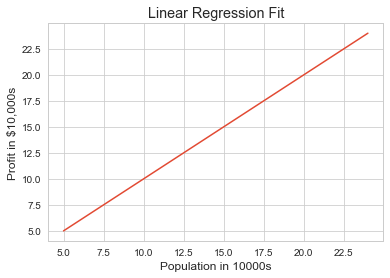

In [53]:
theta = np.squeeze(theta)
#sns.scatterplot(x = "Population", y= "Profit", data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");